In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading data

loans = pd.read_csv('data/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory data analysis

In [6]:
#target count
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5,0,'fico score')

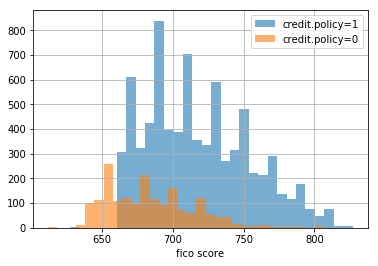

In [12]:
#fico score with credit policy
loans[loans['credit.policy']==1]['fico'].hist(bins=30,alpha=0.6,label='credit.policy=1')

loans[loans['credit.policy']==0]['fico'].hist(bins=30,alpha=0.6,label='credit.policy=0')
plt.legend()
plt.xlabel('fico score')

Text(0.5,0,'fico score')

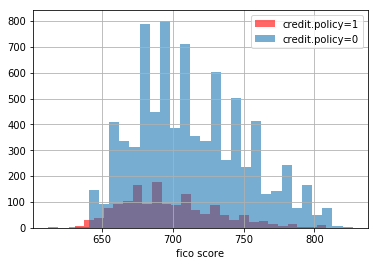

In [15]:
#fico score with not fully paid

loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.6,label='credit.policy=1',color='red')

loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.6,label='credit.policy=0')
plt.legend()
plt.xlabel('fico score')

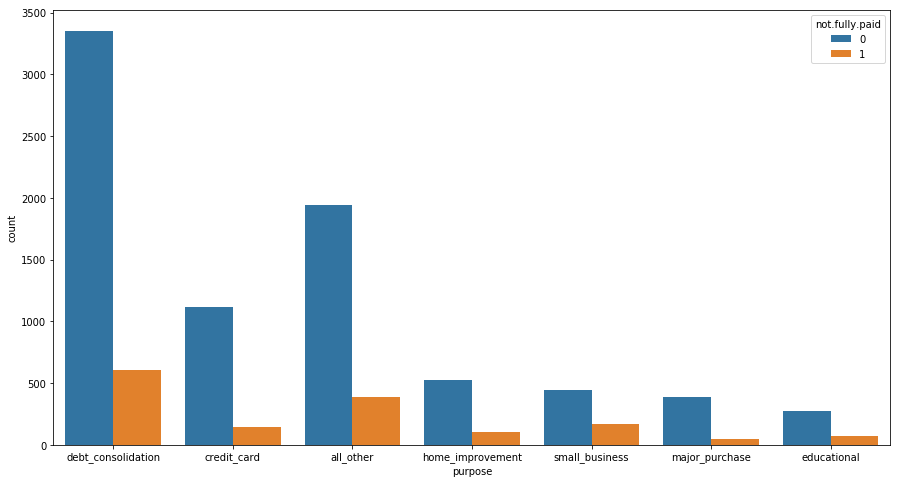

In [24]:
#checking purpose with target(not fully paid)
plt.figure(figsize=(15,8))
sns.countplot(loans['purpose'],hue=loans['not.fully.paid'])

/home/venkat/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/venkat/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


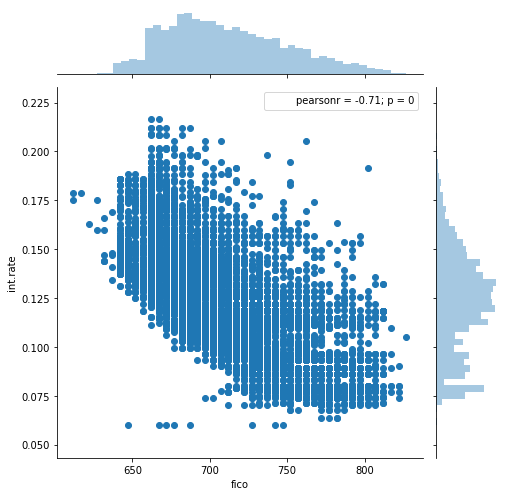

In [30]:
#trend between fico score and interest rate
sns.jointplot(x='fico',y='int.rate',data=loans,size=7)

## Model building

In [31]:
cat_feats=['purpose']
final_data=pd.get_dummies(loans,columns=cat_feats)

In [37]:
X=final_data.drop(columns=['not.fully.paid'],axis=1)
Y=final_data['not.fully.paid']

In [38]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(X,Y,test_size=0.3)

In [42]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
dt=DecisionTreeClassifier()
dt.fit(trainX,trainY)
pred=dt.predict(testX)
print(classification_report(testY,pred))
print(confusion_matrix(testY,pred))
print(accuracy_score(testY,pred))



              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2411
           1       0.20      0.23      0.21       463

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.74      0.73      0.73      2874

[[1982  429]
 [ 356  107]]
0.7268615170494085


In [43]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rf=RandomForestClassifier()
rf.fit(trainX,trainY)
pred=rf.predict(testX)
print(classification_report(testY,pred))
print(confusion_matrix(testY,pred))
print(accuracy_score(testY,pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2411
           1       0.37      0.05      0.09       463

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.61      0.52      0.50      2874
weighted avg       0.77      0.83      0.78      2874

[[2372   39]
 [ 440   23]]
0.8333333333333334


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rf=RandomForestClassifier(n_estimators=1000,max_depth=5,min_samples_leaf=2)
rf.fit(trainX,trainY)
pred=rf.predict(testX)
pred_train=rf.predict(trainX)
print(classification_report(testY,pred))
print(confusion_matrix(testY,pred))

print(accuracy_score(trainY,pred_train))
print(accuracy_score(testY,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2411
           1       0.00      0.00      0.00       463

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.77      2874

[[2411    0]
 [ 463    0]]
0.8403937947494033
0.8389004871259569


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
